In [ ]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 43.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=a7d2be8caaa54891f3eaeffc9ccf2c001a2904b78f006d23e8b375dfeaec16c3
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize-matplotlib


**課題2.1**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import japanize_matplotlib

pd.set_option("display.max_rows",20)
pd.set_option("display.max_columns",None)

CSV_PATH = "cosmetics.csv"

raw = pd.read_csv(CSV_PATH,engine="python" , on_bad_lines="skip")

rename_map = {
    'Label': 'カテゴリ',
    'Brand': 'ブランド',
    'Name': '製品名',
    'Price': '価格',
    'Rank': '評価',
    'Ingredients': '成分',
    'Combination': '混合肌',
    'Dry': '乾燥肌',
    'Normal': '普通肌',
    'Oily': '脂性肌',
    'Sensitive': '敏感肌'
}

usable_map = {k:v for k , v in rename_map.items() if k in raw.columns}
df = raw.rename(columns=usable_map).copy()

for col in ["価格","評価"]:
  if col in df.columns:
    df[col] = pd.to_numeric(df[col],errors = "coerce")

skin_cols = [c for c in ["混合肌","乾燥肌","普通肌","脂性肌","敏感肌"]if c in df.columns]
for c in skin_cols:
  df[c] = pd.to_numeric(df[c],errors= "coerce").fillna(0).astype(int)

for c in [x for x in ["カテゴリ","ブランド","製品名" ]if x in df.columns]:
  df[c] = pd.to_numeric(df[c],errors="coerce").fillna(0).astype(int)

for c in [x for x in ["カテゴリ","ブランド","製品名"]if x in df.columns]:
  df[c] = df[c].astype(str).str.strip()

print("--- 原データ 列 ---")
print(list(raw.columns))

print("---整形後の先頭５行---")
df.head()

--- 原データ 列 ---
['Label', 'Brand', 'Name', 'Price', 'Rank', 'Ingredients', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']
---整形後の先頭５行---


,カテゴリ,ブランド,製品名,価格,評価,成分,混合肌,乾燥肌,普通肌,脂性肌,敏感肌
0,0,0,0,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,0,0,0,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,0,0,0,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,0,0,0,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,0,0,0,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['価格'].plot(kind='hist', bins=20, title='価格')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['評価'].plot(kind='hist', bins=20, title='評価')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['敏感肌'].plot(kind='hist', bins=20, title='敏感肌')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('成分').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='価格', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='価格', y='評価', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='評価', y='敏感肌', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['価格']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('成分')):
  _plot_series(series, series_name, i)
  fig.legend(title='成分', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('価格')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['評価']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('成分')):
  _plot_series(series, series_name, i)
  fig.legend(title='成分', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('評価')

**課題4.1**

--- DataFrame.info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   カテゴリ    1472 non-null   object 
 1   ブランド    1472 non-null   object 
 2   製品名     1472 non-null   object 
 3   価格      1472 non-null   int64  
 4   評価      1472 non-null   float64
 5   成分      1472 non-null   object 
 6   混合肌     1472 non-null   int64  
 7   乾燥肌     1472 non-null   int64  
 8   普通肌     1472 non-null   int64  
 9   脂性肌     1472 non-null   int64  
 10  敏感肌     1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB
--- 欠損件数 ---
価格    0
評価    0
dtype: int64
--- 重複件数（ブランド＋製品名）---
重複: 1471
---記述統計(価格・評価)---
            価格       評価
count  1472.00  1472.00
mean     55.58     4.15
std      45.01     0.63
min       3.00     0.00
25%      30.00     4.00
50%      42.50     4.30
75%      68.00     4.50
max     370.00     5.00


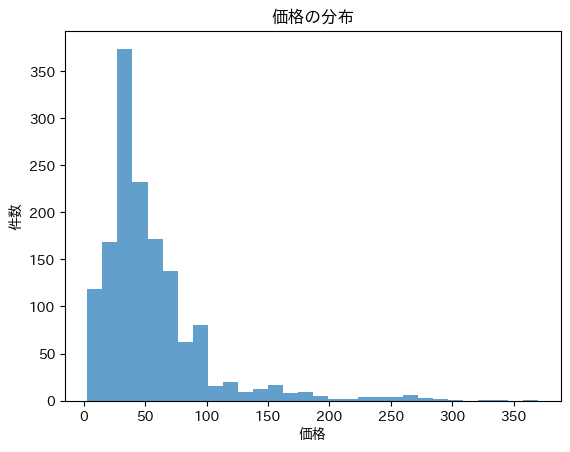

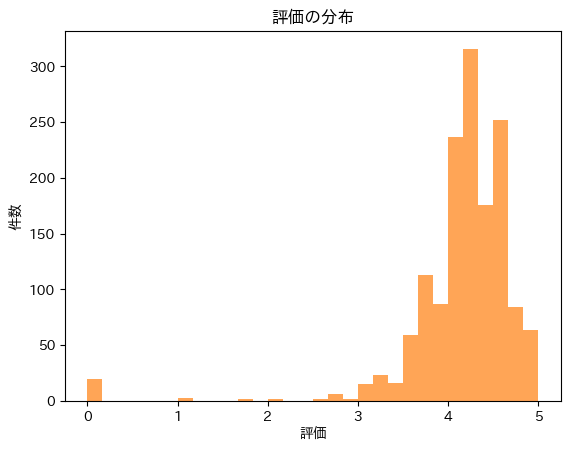

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import japanize_matplotlib

pd.set_option("display.max_rows",20)
pd.set_option("display.max_columns",None)

CSV_PATH = "cosmetics.csv"

raw = pd.read_csv(CSV_PATH,engine="python" , on_bad_lines="skip")

rename_map = {
    'Label': 'カテゴリ',
    'Brand': 'ブランド',
    'Name': '製品名',
    'Price': '価格',
    'Rank': '評価',
    'Ingredients': '成分',
    'Combination': '混合肌',
    'Dry': '乾燥肌',
    'Normal': '普通肌',
    'Oily': '脂性肌',
    'Sensitive': '敏感肌'
}

usable_map = {k:v for k , v in rename_map.items() if k in raw.columns}
df = raw.rename(columns=usable_map).copy()

for col in ["価格","評価"]:
  if col in df.columns:
    df[col] = pd.to_numeric(df[col],errors = "coerce")

skin_cols = [c for c in ["混合肌","乾燥肌","普通肌","脂性肌","敏感肌"]if c in df.columns]
for c in skin_cols:
  df[c] = pd.to_numeric(df[c],errors= "coerce").fillna(0).astype(int)

for c in [x for x in ["カテゴリ","ブランド","製品名" ]if x in df.columns]:
  df[c] = pd.to_numeric(df[c],errors="coerce").fillna(0).astype(int)

for c in [x for x in ["カテゴリ","ブランド","製品名"]if x in df.columns]:
  df[c] = df[c].astype(str).str.strip()

print('--- DataFrame.info ---')
df.info()

print('--- 欠損件数 ---')
print(df[['価格', '評価']].isna().sum())

print('--- 重複件数（ブランド＋製品名）---')
if set(['ブランド', '製品名']).issubset(df.columns):
    dup = df.duplicated(subset=['ブランド', '製品名']).sum()
    print('重複:', dup)
else:
    print('重複: 判定用列が足りません')

print("---記述統計(価格・評価)---")
print(df[["価格","評価"]].describe().round(2))

# ヒストグラム

# 価格の分布
ax = df['価格'].dropna().plot.hist(bins=30, alpha=0.7, title='価格の分布')
ax.set_xlabel('価格')
ax.set_ylabel('件数')
plt.show()

# 評価の分布
ax = df['評価'].dropna().plot.hist(bins=30, alpha=0.7, title='評価の分布', color='tab:orange')
ax.set_xlabel('評価')
ax.set_ylabel('件数')
plt.show()


**提出課題5.1**

--- カテゴリ別 集計 ---


,件数,平均価格,中央価格,平均評価,中央評価
カテゴリ,,,,,
0,1472,55.58,42.5,4.15,4.3


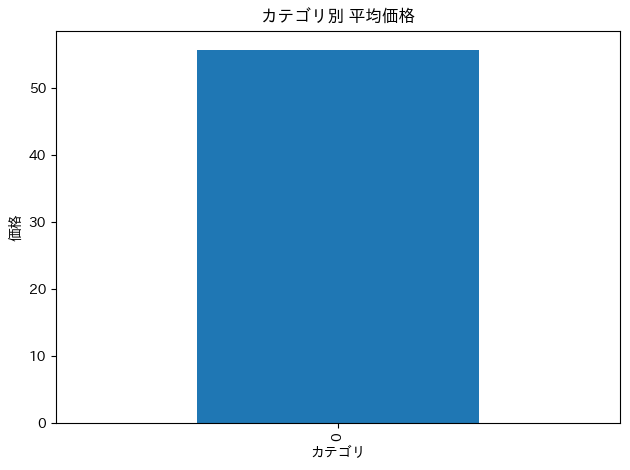

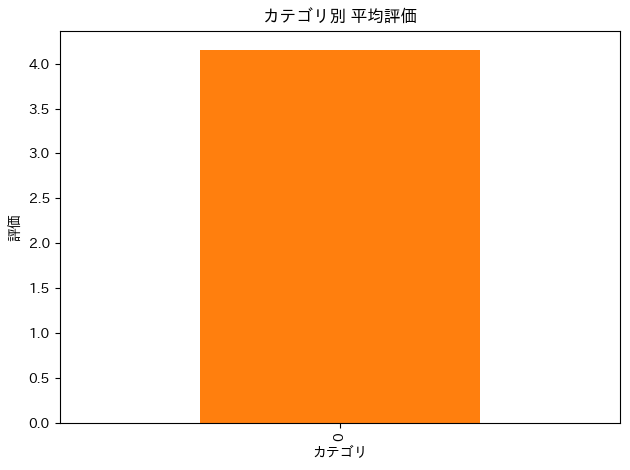

,count
ブランド,
0,1472


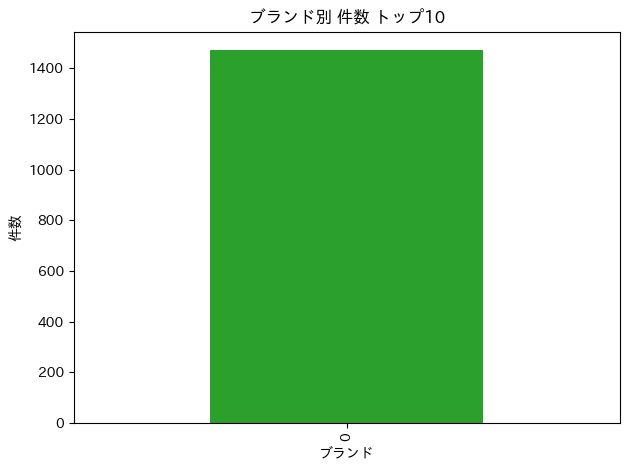

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import japanize_matplotlib

pd.set_option("display.max_rows",20)
pd.set_option("display.max_columns",None)

CSV_PATH = "cosmetics.csv"

raw = pd.read_csv(CSV_PATH,engine="python" , on_bad_lines="skip")

rename_map = {
    'Label': 'カテゴリ',
    'Brand': 'ブランド',
    'Name': '製品名',
    'Price': '価格',
    'Rank': '評価',
    'Ingredients': '成分',
    'Combination': '混合肌',
    'Dry': '乾燥肌',
    'Normal': '普通肌',
    'Oily': '脂性肌',
    'Sensitive': '敏感肌'
}

usable_map = {k:v for k , v in rename_map.items() if k in raw.columns}
df = raw.rename(columns=usable_map).copy()

for col in ["価格","評価"]:
  if col in df.columns:
    df[col] = pd.to_numeric(df[col],errors = "coerce")

skin_cols = [c for c in ["混合肌","乾燥肌","普通肌","脂性肌","敏感肌"]if c in df.columns]
for c in skin_cols:
  df[c] = pd.to_numeric(df[c],errors= "coerce").fillna(0).astype(int)

for c in [x for x in ["カテゴリ","ブランド","製品名" ]if x in df.columns]:
  df[c] = pd.to_numeric(df[c],errors="coerce").fillna(0).astype(int)

for c in [x for x in ["カテゴリ","ブランド","製品名"]if x in df.columns]:
  df[c] = df[c].astype(str).str.strip()


# カテゴリ別集計
if 'カテゴリ' in df.columns:
    grp = df.groupby('カテゴリ').agg(
        件数=('製品名', 'count') if '製品名' in df.columns else ('価格', 'count'),
        平均価格=('価格', 'mean'),
        中央価格=('価格', 'median'),
        平均評価=('評価', 'mean'),
        中央評価=('評価', 'median')
    ).round(2)

    print('--- カテゴリ別 集計 ---')
    display(grp)

    # 可視化: 平均価格・平均評価
    ax = grp['平均価格'].plot.bar(title='カテゴリ別 平均価格', color='tab:blue')
    ax.set_xlabel('カテゴリ')
    ax.set_ylabel('価格')
    plt.tight_layout()
    plt.show()

    ax = grp['平均評価'].plot.bar(title='カテゴリ別 平均評価', color='tab:orange')
    ax.set_xlabel('カテゴリ')
    ax.set_ylabel('評価')
    plt.tight_layout()
    plt.show()

# ブランド別集計（トップ10）
if 'ブランド' in df.columns:
    brand_counts = df['ブランド'].value_counts().head(10)
    display(brand_counts)

    ax = brand_counts.plot.bar(title='ブランド別 件数 トップ10', color='tab:green')
    ax.set_xlabel('ブランド')
    ax.set_ylabel('件数')
    plt.tight_layout()
    plt.show()


**6.1**

カテゴリ,0
ブランド,
0,42.5


カテゴリ,0
ブランド,
0,4.3


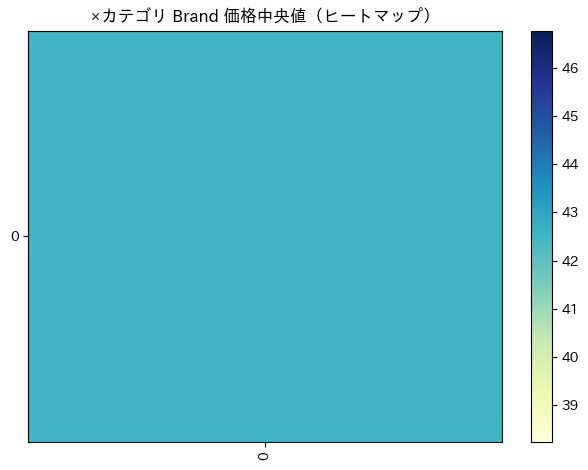

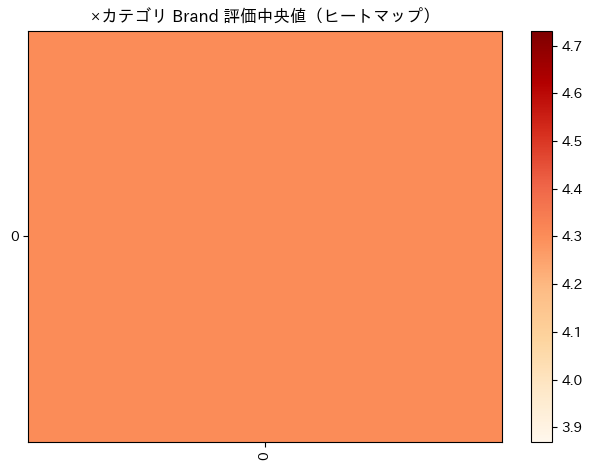

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import japanize_matplotlib

pd.set_option("display.max_rows",20)
pd.set_option("display.max_columns",None)

CSV_PATH = "cosmetics.csv"

raw = pd.read_csv(CSV_PATH,engine="python" , on_bad_lines="skip")

rename_map = {
    'Label': 'カテゴリ',
    'Brand': 'ブランド',
    'Name': '製品名',
    'Price': '価格',
    'Rank': '評価',
    'Ingredients': '成分',
    'Combination': '混合肌',
    'Dry': '乾燥肌',
    'Normal': '普通肌',
    'Oily': '脂性肌',
    'Sensitive': '敏感肌'
}

usable_map = {k:v for k , v in rename_map.items() if k in raw.columns}
df = raw.rename(columns=usable_map).copy()

for col in ["価格","評価"]:
  if col in df.columns:
    df[col] = pd.to_numeric(df[col],errors = "coerce")

skin_cols = [c for c in ["混合肌","乾燥肌","普通肌","脂性肌","敏感肌"]if c in df.columns]
for c in skin_cols:
  df[c] = pd.to_numeric(df[c],errors= "coerce").fillna(0).astype(int)

for c in [x for x in ["カテゴリ","ブランド","製品名" ]if x in df.columns]:
  df[c] = pd.to_numeric(df[c],errors="coerce").fillna(0).astype(int)

for c in [x for x in ["カテゴリ","ブランド","製品名"]if x in df.columns]:
  df[c] = df[c].astype(str).str.strip()


if set(['ブランド', 'カテゴリ']).issubset(df.columns):
    brand_order = df['ブランド'].value_counts().head(12).index
    sub = df[df['ブランド'].isin(brand_order)].copy()

    pivot_price = sub.pivot_table(index='ブランド', columns='カテゴリ',
                                  values='価格', aggfunc='median')
    pivot_rank = sub.pivot_table(index='ブランド', columns='カテゴリ',
                                 values='評価', aggfunc='median')

    display(pivot_price)
    display(pivot_rank)

    # ヒートマップ表示
    for mat, title, cmap in [
        (pivot_price, '×カテゴリ Brand 価格中央値（ヒートマップ）', 'YlGnBu'),
        (pivot_rank, '×カテゴリ Brand 評価中央値（ヒートマップ）', 'OrRd')
    ]:
        arr = mat.values
        ax = plt.imshow(arr, cmap=cmap, aspect='auto')
        plt.colorbar(ax)
        plt.xticks(range(mat.shape[1]), mat.columns, rotation=90)
        plt.yticks(range(mat.shape[0]), mat.index)
        plt.title(title)
        plt.tight_layout()
        plt.show()



**7.1**

,混合肌,乾燥肌,普通肌,脂性肌,敏感肌
ブランド,,,,,
0,0.66,0.61,0.65,0.61,0.51


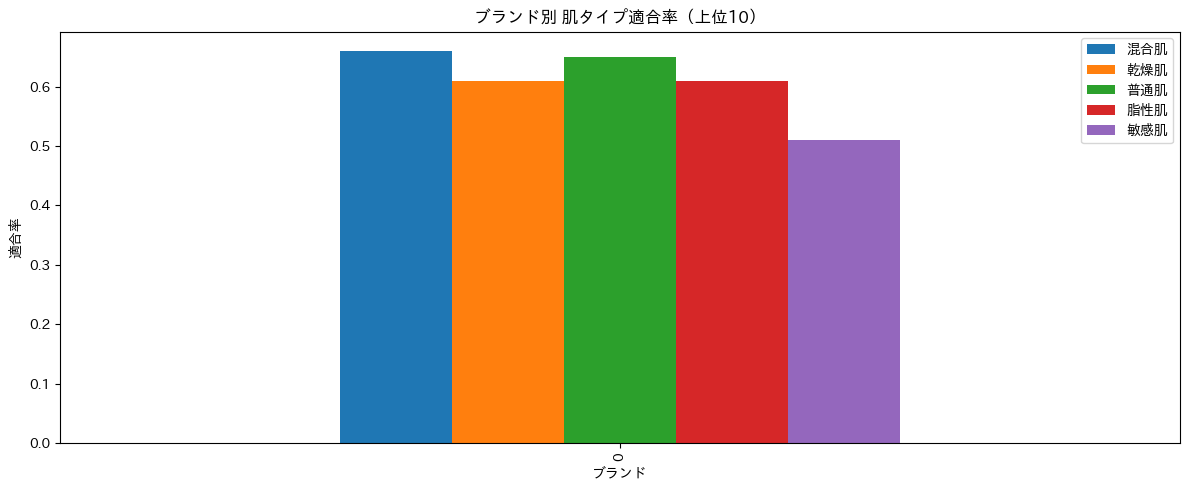

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import japanize_matplotlib

pd.set_option("display.max_rows",20)
pd.set_option("display.max_columns",None)

CSV_PATH = "cosmetics.csv"

raw = pd.read_csv(CSV_PATH,engine="python" , on_bad_lines="skip")

rename_map = {
    'Label': 'カテゴリ',
    'Brand': 'ブランド',
    'Name': '製品名',
    'Price': '価格',
    'Rank': '評価',
    'Ingredients': '成分',
    'Combination': '混合肌',
    'Dry': '乾燥肌',
    'Normal': '普通肌',
    'Oily': '脂性肌',
    'Sensitive': '敏感肌'
}

usable_map = {k:v for k , v in rename_map.items() if k in raw.columns}
df = raw.rename(columns=usable_map).copy()

for col in ["価格","評価"]:
  if col in df.columns:
    df[col] = pd.to_numeric(df[col],errors = "coerce")

skin_cols = [c for c in ["混合肌","乾燥肌","普通肌","脂性肌","敏感肌"]if c in df.columns]
for c in skin_cols:
  df[c] = pd.to_numeric(df[c],errors= "coerce").fillna(0).astype(int)

for c in [x for x in ["カテゴリ","ブランド","製品名" ]if x in df.columns]:
  df[c] = pd.to_numeric(df[c],errors="coerce").fillna(0).astype(int)

for c in [x for x in ["カテゴリ","ブランド","製品名"]if x in df.columns]:
  df[c] = df[c].astype(str).str.strip()



# 肌タイプ列が存在する場合
if skin_cols:
    # ブランド列がある場合のみ上位10ブランドを抽出
    brand_order = df['ブランド'].value_counts().head(10).index if 'ブランド' in df.columns else None

    # 上位10ブランドが存在すればそのサブセット、なければ全体を使用
    sub = df[df['ブランド'].isin(brand_order)].copy() if brand_order is not None else df.copy()

    # ブランド別の肌タイプ適合率（skin_cols の平均）を算出
    rate = sub.groupby('ブランド')[skin_cols].mean().round(2)

    # 表示
    display(rate)

    # 棒グラフ（複数列棒グラフ）
    ax = rate.plot(kind='bar', figsize=(12, 5), title='ブランド別 肌タイプ適合率（上位10）')
    ax.set_ylabel('適合率')
    ax.set_xlabel('ブランド')
    plt.tight_layout()
    plt.show()




**8.1**

--- コスパ上位（カテゴリ: 0）---


,ブランド,製品名,価格,評価,value_score
966,0,0,4,5.0,1.250000
974,0,0,4,5.0,1.250000
498,0,0,4,4.6,1.150000
931,0,0,4,4.3,1.075000
987,0,0,3,3.2,1.066667


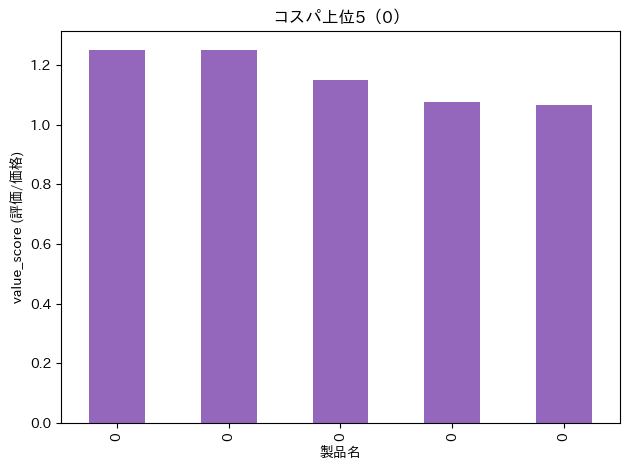

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import japanize_matplotlib

pd.set_option("display.max_rows",20)
pd.set_option("display.max_columns",None)

CSV_PATH = "cosmetics.csv"

raw = pd.read_csv(CSV_PATH,engine="python" , on_bad_lines="skip")

rename_map = {
    'Label': 'カテゴリ',
    'Brand': 'ブランド',
    'Name': '製品名',
    'Price': '価格',
    'Rank': '評価',
    'Ingredients': '成分',
    'Combination': '混合肌',
    'Dry': '乾燥肌',
    'Normal': '普通肌',
    'Oily': '脂性肌',
    'Sensitive': '敏感肌'
}

usable_map = {k:v for k , v in rename_map.items() if k in raw.columns}
df = raw.rename(columns=usable_map).copy()

for col in ["価格","評価"]:
  if col in df.columns:
    df[col] = pd.to_numeric(df[col],errors = "coerce")

skin_cols = [c for c in ["混合肌","乾燥肌","普通肌","脂性肌","敏感肌"]if c in df.columns]
for c in skin_cols:
  df[c] = pd.to_numeric(df[c],errors= "coerce").fillna(0).astype(int)

for c in [x for x in ["カテゴリ","ブランド","製品名" ]if x in df.columns]:
  df[c] = pd.to_numeric(df[c],errors="coerce").fillna(0).astype(int)

for c in [x for x in ["カテゴリ","ブランド","製品名"]if x in df.columns]:
  df[c] = df[c].astype(str).str.strip()


# コスパ指標（value_score = 評価 / 価格）でカテゴリ別に上位5件を抽出し、一覧表示＆棒グラフ化
if set(['価格', '評価']).issubset(df.columns):
    # ゼロ除算での inf を NaN に置き換え
    df['value_score'] = (df['評価'] / df['価格']).replace([np.inf, -np.inf], np.nan)

    if 'カテゴリ' in df.columns:
        top_per_cat = []

        # カテゴリごとに value_score の上位5件を抽出
        for cat, g in df.dropna(subset=['value_score']).groupby('カテゴリ'):
            g2 = g.sort_values('value_score', ascending=False).head(5)
            top_per_cat.append((cat, g2[['ブランド', '製品名', '価格', '評価', 'value_score']]))

        # カテゴリごとの上位表を表示
        for cat, tbl in top_per_cat:
            print(f'--- コスパ上位（カテゴリ: {cat}）---')
            display(tbl)

        # 最も件数の多いカテゴリ（≒上位データが多いカテゴリ）を選び、棒グラフ表示
        if top_per_cat:
            major_cat = max(top_per_cat, key=lambda x: x[1].shape[0])
            tbl = major_cat[1].copy()
            tbl.index = tbl['製品名'].astype(str)

            ax = tbl['value_score'].plot.bar(
                title=f'コスパ上位5（{major_cat[0]}）', color='tab:purple'
            )
            ax.set_ylabel('value_score (評価/価格)')
            ax.set_xlabel('製品名')
            plt.tight_layout()
            plt.show()



